# Minsait Real Estate Modelling - Cajamar UniversityHack 2019
# Template
**<font size="4">Authors: Ugarte&Fernandez (UC3M)  </font>**<br><br>

In [355]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.svm import NuSVR
from sklearn import metrics
from scipy.stats import randint as sp_randint

from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, f_regression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

Set the working directory

In [356]:
#data_dir = 'C:/Users/Jaime Ugarte/Desktop/Data Science/Real State Challenge/datasets'
data_dir = 'C:/Users/alvaro/Desktop/Data Science/Real State Challenge/datasets'
os.chdir(data_dir)
os.getcwd()

'C:\\Users\\alvaro\\Desktop\\Data Science\\Real State Challenge\\datasets'

Import the datasets

In [357]:
X_train = pd.read_csv('Datasets_Reto_Modelling_UH2019/Modelar_UH2019.txt', sep="|")
del X_train['TARGET']
X_train = X_train.drop('HY_id', 1)
Y_train = pd.read_csv('Datasets_Reto_Modelling_UH2019/Modelar_UH2019.txt', sep="|")["TARGET"]
#train_set_i = open("./Datasets_Reto_Modelling_UH2019/demofile.txt", "r")
#train_set_all = 
X_test = pd.read_csv('Datasets_Reto_Modelling_UH2019/Estimar_UH2019.txt', sep="|")
X_test = X_test.drop('HY_id', 1)
X_train.shape
X_train_pruebas=X_train[1:300]


Check number of entries and number of columns

In [4]:
print("Number of entries in training set:",len(train_set))
print("Number of entries in test set:",len(test_set))
print("Number of columns in training set:",len(train_set.columns))
print("Number of columns in test set:",len(test_set.columns))

NameError: name 'train_set' is not defined

Range of the hyper-parameters of the neural network models

In [237]:
sli=X_train[X_train.HY_tipo=="Piso"]
print("Pisos:",sli.shape)
sli=X_train[X_train.HY_tipo=="Garaje"]
print("Garaje:",sli.shape)
sli=X_train[X_train.HY_tipo=="Trastero"]

print("Trastero:",sli.shape)
print(X_train.shape)
pd.unique(X_train.HY_tipo)

Pisos: (4182, 51)
Garaje: (2761, 51)
Trastero: (282, 51)
(9958, 51)


array(['Garaje', 'Casa de pueblo', 'Piso', 'Local', 'Chalet adosado',
       'Dúplex', 'Solar', 'Trastero', 'Chalet independiente',
       'Nave adosada', 'Oficina', 'Nave aislada', 'Almacén',
       'Aparcamiento', 'Suelo rústico no urbanizable',
       'Edificio turístico', 'Ático', 'Otro', 'Edificio comercial',
       'Chalet pareado'], dtype=object)

In [6]:
print(X_train.info())

for col_name in X_train.columns:
    print(col_name)
    print("Type:",X_train[col_name].dtype)
    print("Number of unique values",len(pd.unique(X_train[col_name])))
    print("Null values:",sum(X_train[col_name].isnull()))
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9958 entries, 0 to 9957
Data columns (total 51 columns):
HY_cod_postal                      9958 non-null int64
HY_provincia                       9916 non-null object
HY_descripcion                     6016 non-null object
HY_distribucion                    3213 non-null object
HY_tipo                            9958 non-null object
HY_antiguedad                      4474 non-null float64
HY_metros_utiles                   7072 non-null float64
HY_metros_totales                  9924 non-null float64
HY_num_banos                       9958 non-null int64
HY_cert_energ                      1658 non-null object
HY_num_terrazas                    9958 non-null int64
HY_ascensor                        9958 non-null int64
HY_trastero                        9958 non-null int64
HY_num_garajes                     9958 non-null int64
HY_precio                          9958 non-null float64
HY_precio_anterior                 6800 non-null float6

In [7]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

In [ ]:
#plt.boxplot(data=X_train.iloc[1:5,40:44])
al=X_train.iloc[1:10,46:49]
#print(al)
al_1=np.array(Y_train)
al_2=np.array(X_train.HY_tipo)

al_3=np.column_stack((al_1,al_2))
print(al_3[:,0])
#plt.boxplot(data=al_3,x=al_3[:,0])
#plt.show()

[32.16 30.71 63.48 ... 1029.5 106.0 0.0]


KeyboardInterrupt: 

In [10]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

In [8]:
from sklearn import metrics
from sklearn import neighbors 

#Fixing missing values of province

knn = neighbors.KNeighborsClassifier(n_neighbors=2)

c=X_train["HY_provincia"].isnull()==True

f=np.array(X_train["HY_cod_postal"][c==False])
f=f.reshape(-1,1)
g=np.array(X_train["HY_provincia"][c==False])

knn.fit(X=f,y=g)
h=np.array(X_train["HY_cod_postal"][c==True]).reshape(-1,1)


In [9]:
fixing_train=np.array(X_train["HY_cod_postal"][X_train["HY_provincia"].isnull()])
fixing_train=fixing_train.reshape(-1,1)

fixing_test=np.array(X_test["HY_cod_postal"][X_test["HY_provincia"].isnull()])
fixing_test=fixing_test.reshape(-1,1)


cont=sum(X_train["HY_provincia"].isnull())

#For doing it just one time:
if (cont!=0):
    X_train["HY_provincia"][X_train["HY_provincia"].isnull()]=knn.predict(X=fixing_train)
    X_test["HY_provincia"][X_test["HY_provincia"].isnull()]=knn.predict(X=fixing_test)



C:\Users\alvaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\alvaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [98]:
len(pd.unique(X_train.HY_descripcion))
X_train_2=X_train
X_train_2['is_duplicated'] = X_train.duplicated()
print(sum(X_train_2.is_duplicated))

#Most of the instance could be repeated!

53


In [238]:
#Fixing Dates Of Building
sum(X_train.HY_antiguedad.isnull())

5484

In [240]:
#Just for working until it is proved it works
X_train_pruebas=X_train[1:1000]
#Bucle para arreglar algunos con fechas - se puede hacer lo mismo para intentar otras variables!
for i_1,antiguedad in enumerate(X_train_pruebas.HY_antiguedad):
    if pd.isna(antiguedad):
        if pd.notna(X_train_pruebas.HY_descripcion.iloc[i_1]):
            sentences=X_train_pruebas.HY_descripcion.iloc[i_1].split(".")
            for i_3,sentence in enumerate(sentences):
                split_by_words=sentence.split()
                for i_4,word in enumerate(split_by_words):
                    if "año" == word:
                        try:
                            k=int(split_by_words[i_4+1])
                            print(k)
                            print(i_1)
                            #Necessary to check wheter this is index is one less than expected!
                        except:
                            pass
                                

2006
523
2004
724
2008
741
2006
749
1970
781


In [243]:
print(X_train.iloc[523])
print(X_train.HY_descripcion.iloc[523])

HY_cod_postal                                                                  30600
HY_provincia                                                                  Murcia
HY_descripcion                     Piso de dos dormitorios y un baño en la segund...
HY_distribucion                                 Se distribuye en varias dependencias
HY_tipo                                                                         Piso
HY_antiguedad                                                                    NaN
HY_metros_utiles                                                                  54
HY_metros_totales                                                                 59
HY_num_banos                                                                       1
HY_cert_energ                                                                    NaN
HY_num_terrazas                                                                    0
HY_ascensor                                                      

## Trabajando con las variables categóricas

La idea es que si las variables son categóricas y tenemos muchas categorías, las dimensiones se multiplican al hacer el one-hot encoding. Y también complican el modelo, incrementando el tiempo necesario para la ejecución

In [552]:
#Esta función se define para realizar el análisis exploratorio con boxplots:
def bxpltbycat(predictor,response):
    data=[]
    for i in pd.unique(predictor):
        data.append(response[predictor==i])
    plt.boxplot(labels=pd.unique(predictor),x=data)
    plt.xticks(rotation=90)
    plt.show()


In [553]:
#Esta función se define para agrupar aquellas categorías en las que la distribución sea pequeña.
#Quizá tenga mas sentido, tratar de buscar a cuál de las categorías con mas observaciones se asemeja.
def preprocess(predictor,min_obs):
    not_scope=[]
    key=0

    for i in pd.unique(predictor):
        if sum(predictor==i)<min_obs:
            if i not in not_scope:
                not_scope.append(i)
    others=predictor.copy()

    for idx,name in enumerate(others):
        if name in not_scope:
            others[idx]="not_scope"
    return(others)

In [575]:
#Esta función sirve para realizar el análisis exploratio con density fucntions
def densities(predictor,response,outliers,title=""):    
    
    casos = pd.unique(predictor)

    for caso in casos:
        # Subset to the caso
        subset = response[(predictor == caso) & (response<outliers)]

        # Draw the density plot
        sns.distplot(subset, hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = caso)

    # Plot formatting
    plt.legend(prop={'size': 10}, title = title)
    plt.title('Density Plot with Multiple '+ title)
    plt.xlabel('Time spent (sec)')
    plt.ylabel('Density')
    plt.show()

### Trabajando con las provincias

Primero un análisis exploratorio con los boxplot y density functions:


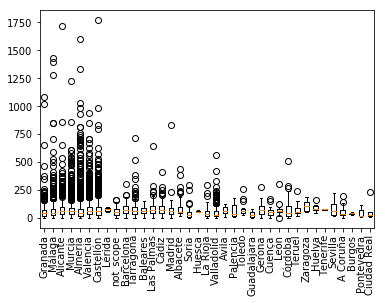

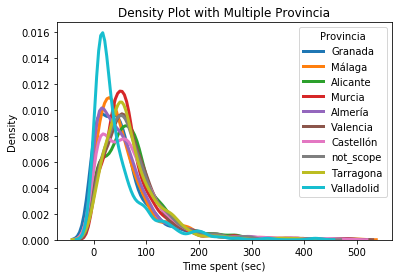

In [582]:
bxpltbycat(predictor=preprocess(X_train.HY_provincia,min_obs=2),response=Y_train)
densities(predictor=preprocess(X_train.HY_provincia,min_obs=200),outliers=500,response=Y_train,title="Provincia")

De este resultado vemos que hay una clara distinción entre provincias. Como tenemos muchas categorías para provincia, podemos hacer dos cosas. O bien nos olvidamos de esta variable, o bien agrupamos.

Viendo el boxplot, podemos observar que hay una seria de provincias con poca representación. Si juntamos todas aquellas que tienen un mínimo de representación de 270 nos queda:

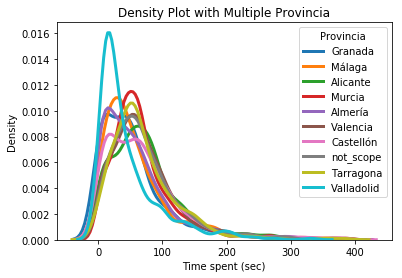

In [593]:
densities(outliers=400,predictor=preprocess(X_train.HY_provincia,min_obs=270),response=Y_train,title="Provincia")

Sabiendo esto, podemos ver que hay como dos grupos en el sentido de que las campanas son distintas. Hemos reducido el numero de categorías que era el propósito. (Los otuliers no se ven reflejados por que afectaban a la escala!)

## Trabajando con los tipos de inmueble

Como antes, lo primero el análisis exploratorio


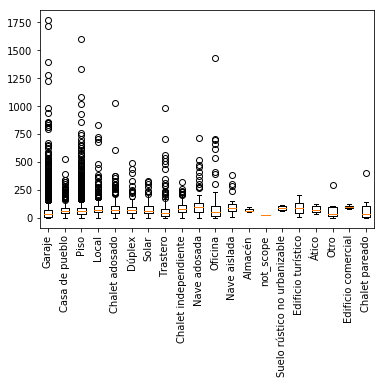

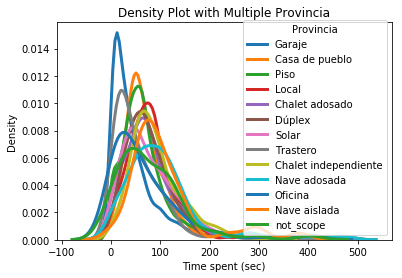

In [594]:
bxpltbycat(predictor=preprocess(X_train.HY_tipo,min_obs=2),response=Y_train)
densities(predictor=preprocess(X_train.HY_tipo,min_obs=20),outliers=500,response=Y_train,title="Provincia")

Ocurre lo mismo que en el caso por provincias, hay que reducir categorías. Hay demasiadas y muchas tienen apenas observaciones

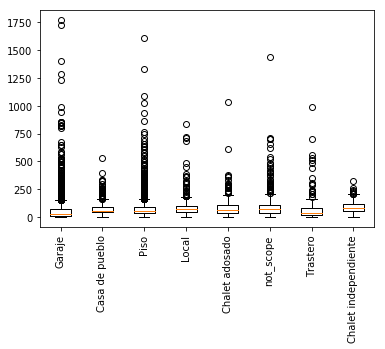

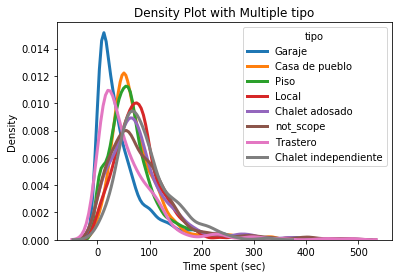

In [595]:
bxpltbycat(predictor=preprocess(X_train.HY_tipo,min_obs=200),response=Y_train)
densities(predictor=preprocess(X_train.HY_tipo,min_obs=200),outliers=500,response=Y_train,title="tipo")

De aquí podemos ver que las densidades están afectadas por el tipo, con lo que habrá que tenerlo en cuenta!
Quizá podamos asociar distintas categorías entre sí - ej. (Casa de pueblo y piso!)

Text(0,0.5,'Time on web')

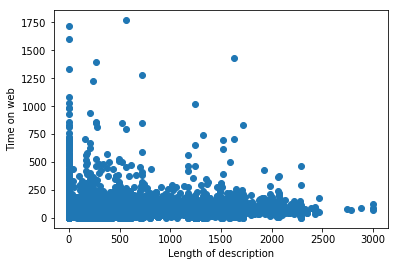

In [307]:
#From this we can see that there is no clear correlation between the length of the text and the time spent on the web
lis=[]
for i in X_train.HY_descripcion:
    if pd.notna(i):
        lis.append(len(i))
    else:
        lis.append(0)

plt.scatter(x=lis,y=Y_train)
plt.xlabel("Length of description")
plt.ylabel("Time on web")



In [ ]:
#To do
##Check whether length of text matters -> Done
##Check just the top in number of outliers
##